# Прогнозирование временных рядов динамической линейной моделью с фильтром Калмана

Динамические линейные модели с фильтрацией Калмана - мощное семейство моделей прогнозирования временных рядов, меняющие коэффициенты регрессии в зависимости от вновь прибывающих данных на основе Байесовского вывода.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random

In [6]:
candy = pd.read_csv('candy_production.csv', index_col='date', parse_dates=True)
candy.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


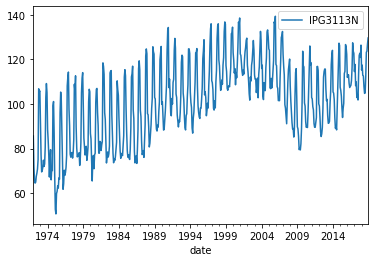

In [7]:
candy.plot()
plt.show()

In [8]:
candy = pd.DataFrame(candy['IPG3113N'])
candy.index = range(0, len(candy))

# Прогнозирование курса ценных бумаг

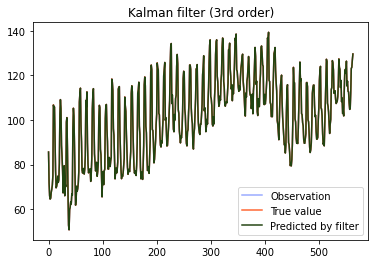

In [9]:
import filterpy.kalman
import filterpy.common

dt = 0.001                       # time step
measurementSigma = 0.001          # standard deviation of sensor
processNoiseVariance = 1e-1             # Errors of the model



# Craete object KalmanFilter
filter = filterpy.kalman.KalmanFilter(dim_x=4,      # dimension of states in the model
                                     dim_z=1)      # dimension of observation vector

# F - state transition matrix, its dimension is dim_x times dim_x - 3х3
filter.F = np.array([[0.5,0.3,0.15,0.05],
                    [1,0,0,0],
                    [0,1,0,0],
                    [0,0,1,0]])

# Observations matrix with dimension equal to dim_z times dim_x - 1x3
filter.H = np.array([[1.0,0,0,0]])

# Covariance matrix of model's errors
filter.Q = filter.Q = filterpy.common.Q_discrete_white_noise(dim=4, dt=dt, var=processNoiseVariance)

# Covariance matrix of observation's errors - 1х1
filter.R = np.array([[measurementSigma*measurementSigma]])

def y_tn(series, n):
    return np.array(series.iloc[-n])


# Initial state
filter.x = np.array([y_tn(candy, 0),
                    y_tn(candy, 1),
                    y_tn(candy, 2),
                    y_tn(candy, 3)])

# Covariance matrix for the initial state
filter.P = 3

filteredState = []
stateCovarianceHistory = []

# Kalman filtering
for i in range(0, len(candy)):
    z = [ candy.iloc[i] ]                      # observation
    filter.predict()                            # prediction step
    filter.update(z)                            # correction step

    filteredState.append(filter.x)
    stateCovarianceHistory.append(filter.P)

filteredState = np.array(filteredState)
stateCovarianceHistory = np.array(stateCovarianceHistory)

# Visualisation
plt.title("Kalman filter (3rd order)")
plt.plot(candy, label="Observation", color="#99AAFF")
plt.plot(candy, label="True value", color="#FF6633")
plt.plot(filteredState[:, 0], label="Predicted by filter", color="#224411")
plt.legend()
plt.show()

In [10]:
MAE = np.sum(np.abs(filteredState[:, 0] - candy))
MAE

IPG3113N    20.339438
dtype: float64

# Прогнозирование траектории курса ценных бумаг

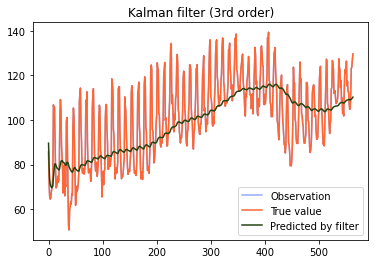

In [11]:
dt = 0.001                       # time step
measurementSigma = 0.5          # standard deviation of sensor
processNoiseVariance = 1e-1             # Errors of the model



# Craete object KalmanFilter
filter = filterpy.kalman.KalmanFilter(dim_x=4,      # dimension of states in the model
                                     dim_z=1)      # dimension of observation vector

# F - state transition matrix, its dimension is dim_x times dim_x - 3х3
filter.F = np.array([[0.5,0.3,0.15,0.05],
                    [1,0,0,0],
                    [0,1,0,0],
                    [0,0,1,0]])

# Observations matrix with dimension equal to dim_z times dim_x - 1x3
filter.H = np.array([[1.0,0,0,0]])

# Covariance matrix of model's errors
filter.Q = filter.Q = filterpy.common.Q_discrete_white_noise(dim=4, dt=dt, var=processNoiseVariance)

# Covariance matrix of observation's errors - 1х1
filter.R = np.array([[measurementSigma*measurementSigma]])

def y_tn(series, n):
    return np.array(series.iloc[-n])


# Initial state
filter.x = np.array([y_tn(candy, 0),
                    y_tn(candy, 1),
                    y_tn(candy, 2),
                    y_tn(candy, 3)])

# Covariance matrix for the initial state
filter.P = 3

filteredState = []
stateCovarianceHistory = []

# Kalman filtering
for i in range(0, len(candy)):
    z = [ candy.iloc[i] ]                      # observation
    filter.predict()                            # prediction step
    filter.update(z)                            # correction step

    filteredState.append(filter.x)
    stateCovarianceHistory.append(filter.P)

filteredState = np.array(filteredState)
stateCovarianceHistory = np.array(stateCovarianceHistory)

# Visualisation
plt.title("Kalman filter (3rd order)")
plt.plot(candy, label="Observation", color="#99AAFF")
plt.plot(candy, label="True value", color="#FF6633")
plt.plot(filteredState[:, 0], label="Predicted by filter", color="#224411")
plt.legend()
plt.show()